# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Gathering Data</a></li>
<li><a href="#eda">Assessing Data</a></li>
<li><a href="#conclusions">Cleaning Data</a></li>
    <li><a href="#Limitation">Analysing and Visualization</a></li>
    <li><a href="#Conclusion">Conclusion</a></li>
<li><a href="#Reference">Reference</a></li>
</ul>

### Introduction
This project is based on the "WeRateDogs" Twitter page, a page which is used to rate pictures and videos of dogs. My task here is to go through the wrangling processes: by gathering, accessing, and cleaning data. Create Insights and visualizations. I will be gathering data from three different sources. It is also mandatory for me to assess the data manually and programmatically in order to identify some qualities and tidiness issues associated with the datasets.

In [235]:
# accessing the python libraries
import numpy as np
import pandas as pd
import json 
import os
import matplotlib.pyplot as plt
from IPython.display import Image
from functools import reduce
import requests
import tweepy
import seaborn as sb
import seaborn as sns


## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [129]:
df= pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [130]:
df.shape

(2356, 17)

In [131]:
df.shape[0]

2356

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [132]:
# Set the URL of the file to be downloaded
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Set the name of the folder to save the file in
folder_name = 'image-predictions'

# Check if the folder already exists; if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Extract the file name from the URL and save it in a variable
file_name = url.split('/')[-1]

# Send an HTTP request to download the file
response = requests.get(url)

# Combine the folder name and file name to create the file path
file_path = os.path.join(folder_name, file_name)

# Open the file in binary write mode and write the content of the HTTP response to the file
with open(file_path, mode='wb') as file:
    file.write(response.content)


In [74]:
os.listdir(folder_name)

['image-predictions.tsv']

In [133]:
# Specify the file path for the TSV file, using the folder_name variable created earlier
file_path = folder_name + '/image-predictions.tsv'

# Read the TSV file into a Pandas DataFrame using the read_csv method
# The sep parameter is set to '\t' to indicate that the file is tab-separated
image_predictions_df = pd.read_csv(file_path, sep='\t')

# Display the first three rows of the DataFrame to confirm that the data has been loaded correctly
image_predictions_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [134]:
image_predictions_df.tweet_id.duplicated().sum()

0

In [135]:
image_predictions_df.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [136]:
# Assign the four authentication tokens to their corresponding variables
consumer_key = 'XXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXX'

# Create an OAuthHandler object using the consumer key and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set the access token and secret using the auth.set_access_token() method
auth.set_access_token(access_token, access_secret)

# Create an API object using the auth object and set the wait_on_rate_limit and wait_on_rate_limit_notify parameters to True
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [14]:
api

In [137]:

def extract_columns(json_obj):
    return {
        'tweet_id': json_obj['id'],
        'retweet_count': json_obj['retweet_count'],
        'followers_count': json_obj['user']['followers_count'],
        'favorite_count': json_obj['favorite_count']
    }

df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        json_obj = json.loads(line)
        df_list.append(json_obj)

tweet_json = pd.DataFrame(df_list)

# apply the extract_columns() function to each row of the DataFrame
tweet_json = tweet_json.apply(lambda row: extract_columns(row), axis=1, result_type='expand')

print(tweet_json.head())


   favorite_count  followers_count  retweet_count            tweet_id
0           39467          3200889           8853  892420643555336193
1           33819          3200889           6514  892177421306343426
2           25461          3200889           4328  891815181378084864
3           42908          3200889           8964  891689557279858688
4           41048          3200889           9774  891327558926688256


In [16]:
tweet_json.head()

,favorite_count,followers_count,retweet_count,tweet_id
0,39467,3200889,8853,892420643555336193
1,33819,3200889,6514,892177421306343426
2,25461,3200889,4328,891815181378084864
3,42908,3200889,8964,891689557279858688
4,41048,3200889,9774,891327558926688256


In [138]:
tweet_json.shape

(2354, 4)

## Assessing Data

In [80]:
tweet_json.head()

,favorite_count,followers_count,retweet_count,tweet_id
0,39467,3200889,8853,892420643555336193
1,33819,3200889,6514,892177421306343426
2,25461,3200889,4328,891815181378084864
3,42908,3200889,8964,891689557279858688
4,41048,3200889,9774,891327558926688256


In [139]:
tweet_json.describe()

,favorite_count,followers_count,retweet_count,tweet_id
count,2354.000000,2.354000e+03,2354.000000,2.354000e+03
mean,8080.968564,3.200942e+06,3164.797366,7.426978e+17
std,11814.771334,4.457302e+01,5284.770364,6.852812e+16
min,0.000000,3.200799e+06,0.000000,6.660209e+17
25%,1415.000000,3.200898e+06,624.500000,6.783975e+17
50%,3603.500000,3.200945e+06,1473.500000,7.194596e+17
75%,10122.250000,3.200953e+06,3652.000000,7.993058e+17
max,132810.000000,3.201018e+06,79515.000000,8.924206e+17


In [140]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
retweet_count      2354 non-null int64
tweet_id           2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [141]:
 df[['rating_numerator']].describe()

,rating_numerator
count,2356.000000
mean,13.126486
std,45.876648
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,1776.000000


In [142]:
 df[['rating_denominator']].describe()

,rating_denominator
count,2356.000000
mean,10.455433
std,6.745237
min,0.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,170.000000


In [143]:
 df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [85]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [144]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [146]:
df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Toby            7
Buddy           7
an              7
Daisy           7
Bailey          7
Milo            6
Koda            6
Leo             6
Jax             6
Stanley         6
Scout           6
Rusty           6
Jack            6
Oscar           6
Bella           6
Dave            6
Chester         5
             ... 
Dug             1
Philippe        1
Ruffles         1
Godzilla        1
Beya            1
Pawnd           1
Batdog          1
Doobert         1
Rambo           1
Harry           1
Bertson         1
Fabio           1
Luther          1
Ivar            1
Gustaf          1
Dallas          1
Henry           1
Longfellow      1
Rodney          1
Clyde           1
Chuck           1
Ralphé          1
Rascal          1
Dietrich        1
life      

In [27]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

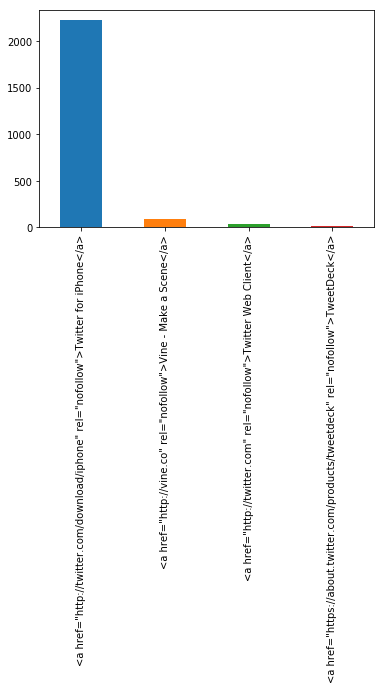

In [89]:
df.source.value_counts().plot.bar()
plt.show()

In [90]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [148]:
df.duplicated().sum()

0

In [149]:
image_predictions_df.duplicated().sum()

0

In [230]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [234]:
# An image for tweet_id 666020888022790149
Image(url = 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')

In [151]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


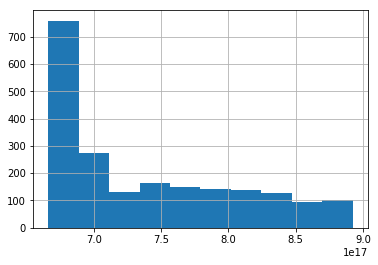

In [152]:
image_predictions_df['tweet_id'].hist()
plt.show()

In [37]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# Quality issues

### Twitter Archive  Table

1. Convert timestamp to datetime format and remove +0000 from the date.

2. Wrong datatypes used in these columns (tweet_id, rating_denominator,rating_numerator, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo).

3. Keep only original ratings  with images 

4. Some dog names are mistyped as a, an the, and such.

5.  Add the various dog types: (doggo, floofer, pupper, puppo) to one column

6. Some columns (timestamp to tweet_timestamp, text to tweet_text, rating_numerator to dog_ratingt, name to dog_names) will be renamed so it can make more sense

7. Remove columns that wont't be used ot data anaysis and vusialisation.

8. Source column is not a string datatype but in HTML-format.

9. Some values in p1, p2, and p3 columns have their first letter in capital letter which makes our date to be  inconsistent 


# Tidiness issues

### Twitter Archive  Table
1. doggo, floofer, pupper and puppo columns in twitter-archive table should be in one column  and probably named as **dog_stage**

### Image Prediction
2. The image prediction table should be joined with the twitter archive table.

### Twitter API Table
3. The twitter Api  with the following columns(retweet_count, favorite_count, followers_count) should be joined with  twitter archive table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [153]:
# Make copies of original pieces of data
df_clean = df.copy()
image_predictions_clean = image_predictions_df.copy()
twitter_api_clean = tweet_json.copy()

### Issue #1:

#### Define: Convert timestamp to datetime format and remove +0000 from the date

#### Code

In [154]:
# Convert 'timestamp' column to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

# Remove timezone offset
df_clean['timestamp'] = df_clean['timestamp'].dt.tz_localize(None)

#### Test

In [155]:
df_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [156]:
df_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

### Isssue #2

### Define Delete retweets

### Test

In [157]:
# To remove the retweets
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
# To remove the replies
df_clean = df_clean[df_clean.in_reply_to_status_id.isnull()]

In [158]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### Issue #3:

#### Define:  Wrong datatype used in the listed  columns

#### Code

In [159]:
# Convert 'tweet_id' columns to string data type
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
twitter_api_clean['tweet_id'] = twitter_api_clean['tweet_id'].astype(str)

# Convert 'source' column to category data type
df_clean['source'] = df_clean['source'].astype('category')


#### Test

In [160]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [161]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null category
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: category(1), datetime

### Issue #4:

### Define:  Some dog names are mistyped as a, an the, and such.

In [162]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [163]:
df_clean['name'][df_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Test

In [164]:
 # confirm changes
df_clean.name.value_counts()

None       707
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         8
Daisy        7
Toby         7
Oscar        6
Bo           6
Koda         6
Bailey       6
Jax          6
Stanley      6
Bella        6
Rusty        5
Buddy        5
Louis        5
Chester      5
Bentley      5
Milo         5
Dave         5
Scout        5
Leo          5
Phil         4
Jeffrey      4
          ... 
Sweet        1
Karl         1
Durg         1
Ginger       1
Ralphus      1
Dawn         1
Rascal       1
Shikha       1
Josep        1
Remy         1
Rumpole      1
Butters      1
Puff         1
Carper       1
Jarod        1
Randall      1
Trevith      1
Furzey       1
Harry        1
Chuck        1
Bertson      1
Fabio        1
Luther       1
Ivar         1
Gustaf       1
Dallas       1
Henry        1
Rambo        1
Rodney       1
Lupe         1
Name: name, Length: 930, dtype: int64

# Issue #5

### Define  Add the various dog types: (doggo, floofer, pupper, puppo) to one column

### Code

In [165]:
# Extract the text from the columns into the new dog_type colunn
df_clean['dog_type'] = df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

### Test

In [166]:
df_clean[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,dog_type,doggo,floofer,pupper,puppo
1054,NaN,None,None,None,None
743,NaN,None,None,None,None
1567,NaN,None,None,None,None
1681,NaN,None,None,None,None
878,NaN,None,None,None,None


### Issue #6:

### Define: Give the following columns (timestamp to tweet_timestamp, text to tweet_text, rating_numerator to dog_ratings", name" to dog_names) a new name so it can make more sense

### Code 

In [167]:
column_names = {'timestamp': 'tweet_timestamp', 'text': 'tweet_text',\
              'name': 'dog_name'}


df_clean.rename(columns=column_names, inplace=True)

### Test

In [168]:
list(df_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'dog_type']

### Issue #7

### Define: remove columns that won't be used ot data anaysis and vusialisation

### Code

In [169]:
# Drop columns from DataFrame
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1 )


### Test

In [170]:
df_clean.head()

,tweet_id,tweet_timestamp,source,tweet_text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN


In [115]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
tweet_timestamp       2097 non-null datetime64[ns]
source                2097 non-null category
tweet_text            2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
dog_name              2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dog_type              353 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(8)
memory usage: 198.8+ KB


### Issue 8#

### Define: Standardize dog ratings

### Code

In [171]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

### Test 

In [172]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
tweet_timestamp       2097 non-null datetime64[ns]
source                2097 non-null category
tweet_text            2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
dog_name              2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dog_type              353 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), object(8)
memory usage: 198.8+ KB


### Issue #9

### Define:  Change Source to a string datatype but in HTML-format

### Code

In [173]:
#extract values
df_clean.source = df_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

In [174]:
df_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #10

In [175]:
image_predictions_clean.p1= image_predictions_clean.p1.str.capitalize()
image_predictions_clean.p2= image_predictions_clean.p2.str.capitalize()
image_predictions_clean.p3= image_predictions_clean.p3.str.capitalize()

In [93]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [176]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
tweet_timestamp       2097 non-null datetime64[ns]
source                2097 non-null object
tweet_text            2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
dog_name              2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dog_type              353 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 213.0+ KB


### Code

### Test

## Tidiness

### Define  merge 'twitterapi_clean' table with 'archive_clean' table

### Code

In [177]:
# merge 'twitterapi_clean' table with 'df_clean' table
df_clean = df_clean.merge(twitter_api_clean, on='tweet_id', how='inner')

# merge 'image_clean' table with 'df_clean' table
df_clean = df_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

### Test

In [178]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id              1971 non-null object
tweet_timestamp       1971 non-null datetime64[ns]
source                1971 non-null object
tweet_text            1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
dog_name              1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dog_type              322 non-null object
favorite_count        1971 non-null int64
followers_count       1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 no

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [183]:
# Storing the cleaned data to csv

df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [184]:
df_master= pd.read_csv('twitter_archive_master.csv')

In [185]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id              1971 non-null int64
tweet_timestamp       1971 non-null object
source                1971 non-null object
tweet_text            1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
dog_name              1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dog_type              322 non-null object
favorite_count        1971 non-null int64
followers_count       1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null ob

### Insight: Relationship between retweet and followers

### visualization

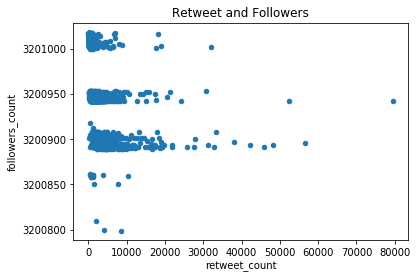

In [186]:
# Correlation between retweet and followers
df_master.plot(x='retweet_count', y='followers_count', kind='scatter', title = 'Retweet and Followers')

In [187]:
df_master['retweet_count'].corr(df_master['followers_count'])

-0.36568251492003656

The above result indicates that there is a negative correlation between retweet and followers

 ### Relationship between favorite and retweet

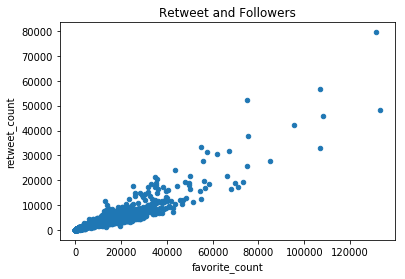

In [188]:
# Correlation between retweet and followers
df_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Retweet and Followers')

In [189]:
df_master['favorite_count'].corr(df_master['retweet_count'])

0.91301434861074338

The above result suggests positive corellation between favaorite and retweet. i.e as favorite tweet increases there there is an increase in retweet as well.

### Insight:
### What is the most used Twitter platform/source?

In [192]:
source = df_master['source'].value_counts()
source

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Visualisation

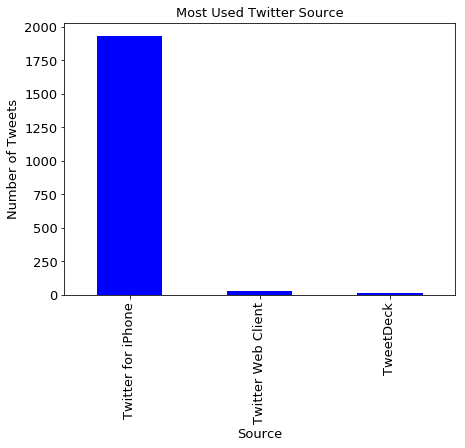

In [193]:
# plot bar chart
ax = source.plot(kind='bar', color='blue', fontsize=13, figsize=(7, 5))

# set title and axis labels
ax.set_title('Most Used Twitter Source', fontsize=13)
ax.set_xlabel('Source', fontsize=13)
ax.set_ylabel('Number of Tweets', fontsize=13)

# display chart
plt.show()


### Insight   Number of Retweet over time 

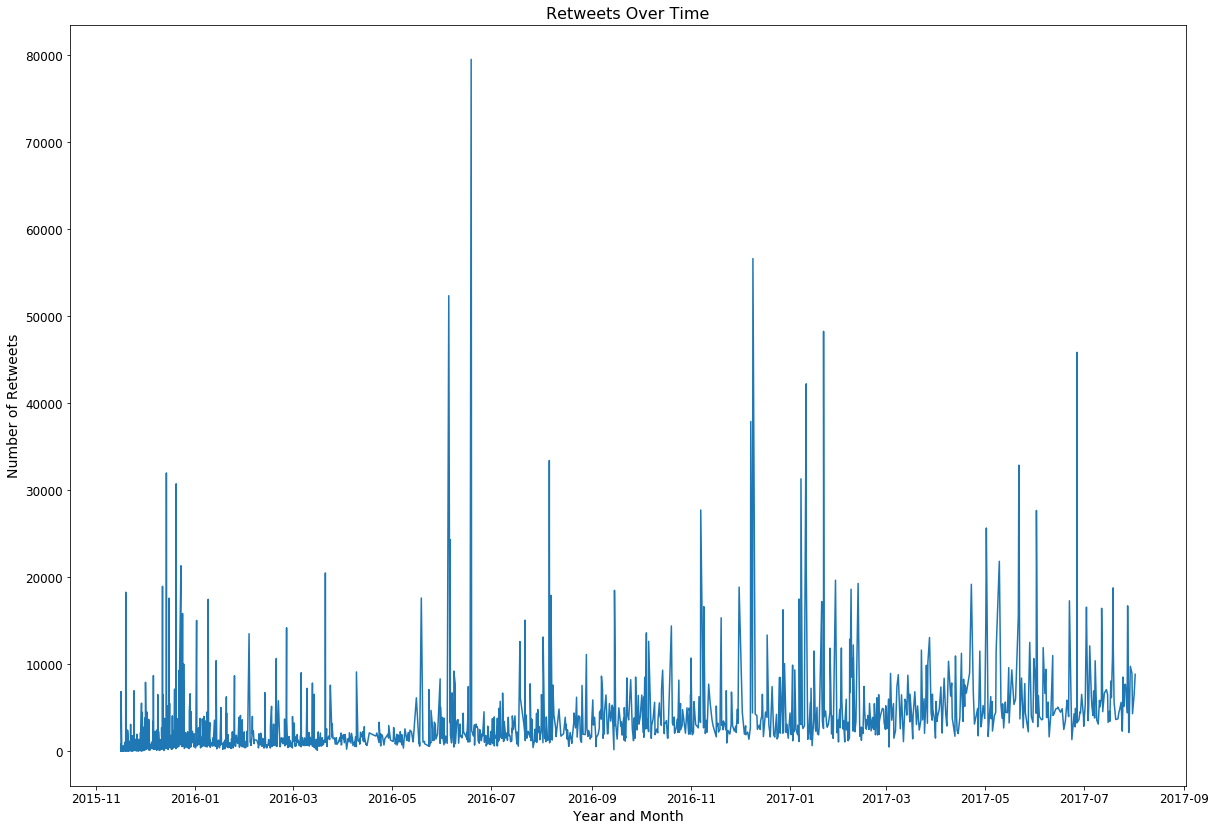

In [206]:
# use default context
sns.set_context() 
fig, ax = plt.subplots(figsize=(20, 14))

# plot line chart
ax.plot(df_clean.tweet_timestamp, df_clean.retweet_count)

# set title and axis labels with updated font sizes
ax.set_title('Retweets Over Time', fontsize=16)
ax.set_xlabel('Year and Month', fontsize=14)
ax.set_ylabel('Number of Retweets', fontsize=14)

# update tick label font sizes
ax.tick_params(axis='both', labelsize=12)

# display chart
plt.show()


### Most Frequent dog_name

In [208]:
 Frequent_dog_name = df_master.dog_name.value_counts()[1:15]

In [209]:
 Frequent_dog_name

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Toby        7
Lola        7
Daisy       7
Stanley     6
Koda        6
Bo          6
Name: dog_name, dtype: int64

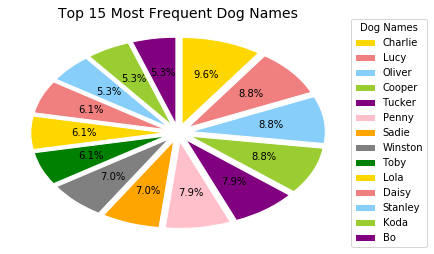

In [210]:
# slice the top 15 most frequent dog names from the series
top_dog_names = Frequent_dog_name.index.tolist()
top_dog_counts = Frequent_dog_name.values.tolist()

# set up chart parameters
colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen', 'purple', 'pink', 'orange', 'grey', 'green']
explode = [0.1] * len(top_dog_names)
title = 'Top 15 Most Frequent Dog Names'

# plot pie chart
fig, ax = plt.subplots()
ax.pie(top_dog_counts, colors=colors, explode=explode, autopct='%1.1f%%',
       startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white'})
ax.legend(top_dog_names, title='Dog Names', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title(title, fontsize=14)

# display chart
plt.show()


#### From the above insight and visualization we could deduce that **Charlie** got the highest name of dog

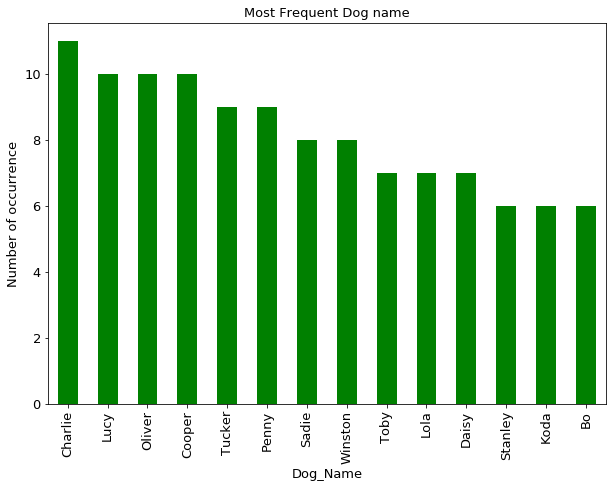

In [216]:
g_bar = Frequent_dog_name.plot(kind='bar', color='green', fontsize=13)

# Set the size of the figure
g_bar.figure.set_size_inches(10, 7)

# Set the title and axis labels
g_bar.set_title('Most Frequent Dog Names', color='black', fontsize=15)
g_bar.set_xlabel('Dog Name', color='black', fontsize=13)
g_bar.set_ylabel('Number of Occurrences', color='black', fontsize=13)

# Rotate the x-axis labels for better readability
g_bar.tick_params(axis='x', labelrotation=45)


We can seee from the abpve that **Charlie** has the highest with 12.

### Most Dog type

In [218]:
df_master['dog_type'].value_counts()

pupper     220
doggo       71
puppo       28
floofer      3
Name: dog_type, dtype: int64

### Conclusion

In this project, I have gone through the process of gathering, 
assessing, and cleaning data which is called wrangling data.I have also done some analysis and visualisation of data. 

### Reference 

1. https://learn.udacity.com/nanodegrees/nd002/parts/cd0015/lessons/ls0525/concepts/5f33b314-1ed6-44ef-9ee8-4266a6e8b9bb
2. https://learn.udacity.com/nanodegrees/nd002/parts/cd0015/lessons/ls2230/concepts/9d235192-1e78-4874-99ec-087542795d07
3. https://learn.udacity.com/nanodegrees/nd002/parts/cd0015/lessons/ls2231/concepts/1767da7d-8f4c-444e-8e3f-5993f413c5ef
4. https://stackoverflow.com/questions/46799662/missing-data-in-pandas-merge
5. https://stackoverflow.com/questions/46754398/pandas-merge-returns-nan
6. https://stackoverflow.com/questions/45123924/convert-pandas-dataframe-from-wide-to-long
7. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.wide_to_long.html
8. https://aviaryan.in/blog/gsoc/downloading-files-from-urls.html
9. https://stackoverflow.com/questions/44699682/how-to-save-a-file-downloaded-from-requests-to-another-directory